# Import statements

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm

# File paths

In [2]:
full_data_csv = 'Full_data.csv'

# Reading the data

In [3]:
data = pd.read_csv(full_data_csv)

In [4]:
data.tail()

,Month,financialcrisis,stockmarketcrash,debt,bullmarket,bearmarket,recession,economicboom,Price,PercentageChange,DummyTime
189,2019-10,8.0,17.0,43.0,40.0,17.0,30.0,38.0,3140.98,3.404706,190.0
190,2019-11,8.0,16.0,39.0,48.0,18.0,23.0,49.0,3093.20,-1.521181,191.0
191,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
192,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
193,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
data.drop(index=[191,192,193], inplace=True)

In [6]:
data.tail()

,Month,financialcrisis,stockmarketcrash,debt,bullmarket,bearmarket,recession,economicboom,Price,PercentageChange,DummyTime
186,2019-07,6.0,9.0,41.0,34.0,17.0,20.0,12.0,2926.46,-0.520097,187.0
187,2019-08,6.0,18.0,42.0,35.0,20.0,82.0,16.0,2976.74,1.718117,188.0
188,2019-09,8.0,11.0,41.0,34.0,16.0,35.0,30.0,3037.56,2.043175,189.0
189,2019-10,8.0,17.0,43.0,40.0,17.0,30.0,38.0,3140.98,3.404706,190.0
190,2019-11,8.0,16.0,39.0,48.0,18.0,23.0,49.0,3093.20,-1.521181,191.0


In [7]:
data.describe()

,financialcrisis,stockmarketcrash,debt,bullmarket,bearmarket,recession,economicboom,Price,PercentageChange,DummyTime
count,191.000000,191.00000,191.000000,191.000000,191.000000,191.000000,191.000000,191.000000,191.000000,191.0000
mean,10.717277,17.21466,42.235602,45.926702,18.392670,19.094241,37.591623,1679.749424,0.605033,96.0000
std,10.409190,10.64306,8.032958,13.169537,9.706631,16.361107,21.338641,598.109557,3.897651,55.2811
min,1.000000,5.00000,30.000000,16.000000,5.000000,4.000000,0.000000,735.090000,-16.942453,1.0000
25%,5.500000,11.00000,38.000000,36.000000,14.000000,9.000000,21.000000,1219.610000,-1.514584,48.5000
50%,9.000000,16.00000,41.000000,45.000000,16.000000,15.000000,33.000000,1420.860000,1.106060,96.0000
75%,12.000000,20.50000,45.000000,53.500000,20.000000,20.500000,49.000000,2079.885000,2.973920,143.5000
max,100.000000,100.00000,100.000000,100.000000,100.000000,100.000000,100.000000,3140.980000,10.772304,191.0000


# Finding the correlation

In [8]:
data.corr()

,financialcrisis,stockmarketcrash,debt,bullmarket,bearmarket,recession,economicboom,Price,PercentageChange,DummyTime
financialcrisis,1.000000,0.333674,0.417175,0.329380,0.297553,0.640924,0.033457,-0.224597,-0.317383,0.037436
stockmarketcrash,0.333674,1.000000,0.144874,0.551046,0.466662,0.182836,0.310905,0.097322,-0.339067,0.028751
debt,0.417175,0.144874,1.000000,0.121904,0.171337,0.457315,-0.108775,-0.305483,-0.157142,-0.154361
bullmarket,0.329380,0.551046,0.121904,1.000000,0.575983,0.302580,0.478806,0.327729,-0.064313,0.363593
bearmarket,0.297553,0.466662,0.171337,0.575983,1.000000,0.441469,0.094238,0.153807,-0.337649,0.176278
recession,0.640924,0.182836,0.457315,0.302580,0.441469,1.000000,-0.043894,-0.158789,-0.227655,0.036195
economicboom,0.033457,0.310905,-0.108775,0.478806,0.094238,-0.043894,1.000000,0.372775,0.064714,0.375075
Price,-0.224597,0.097322,-0.305483,0.327729,0.153807,-0.158789,0.372775,1.000000,0.104628,0.872714
PercentageChange,-0.317383,-0.339067,-0.157142,-0.064313,-0.337649,-0.227655,0.064714,0.104628,1.000000,0.078035
DummyTime,0.037436,0.028751,-0.154361,0.363593,0.176278,0.036195,0.375075,0.872714,0.078035,1.000000


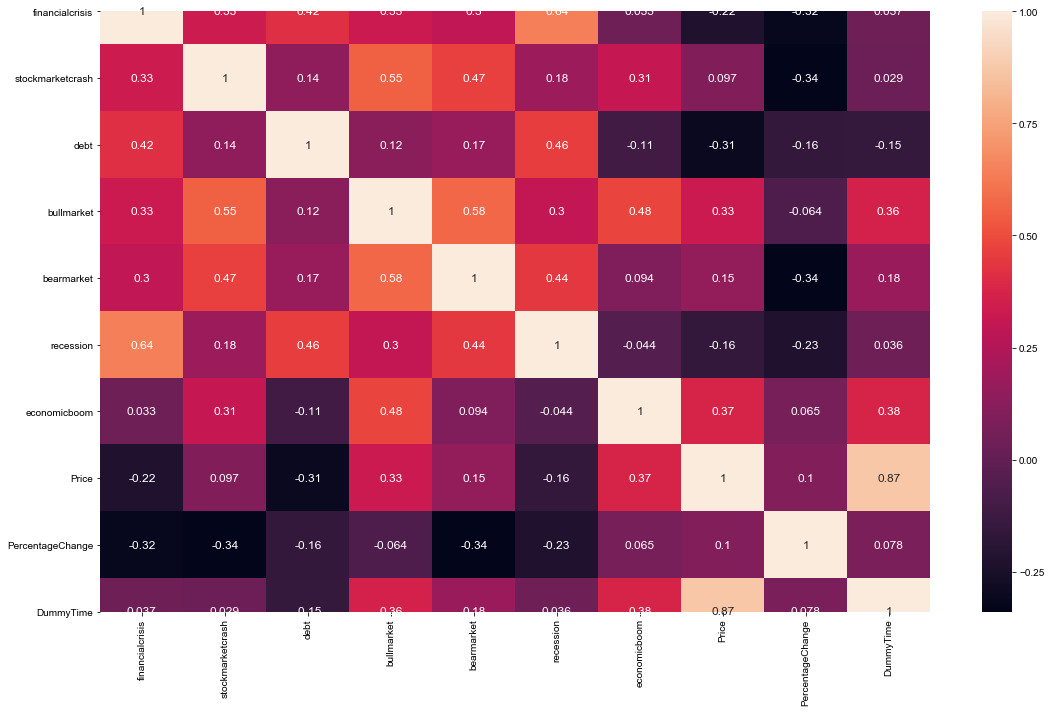

In [9]:
plt.figure(figsize=(16,10))
sns.heatmap(data.corr(), annot=True, annot_kws={"size": 12})
sns.set_style('white')

plt.tight_layout()
plt.show()


In [10]:
mask = np.zeros_like(data.corr())
triangle_indices = np.triu_indices_from(mask)
triangle_indices

(array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2,
        2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 4, 4, 4, 4, 4, 4, 5, 5, 5, 5,
        5, 6, 6, 6, 6, 7, 7, 7, 8, 8, 9]),
 array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 1, 2, 3, 4, 5, 6, 7, 8, 9, 2, 3, 4,
        5, 6, 7, 8, 9, 3, 4, 5, 6, 7, 8, 9, 4, 5, 6, 7, 8, 9, 5, 6, 7, 8,
        9, 6, 7, 8, 9, 7, 8, 9, 8, 9, 9]))

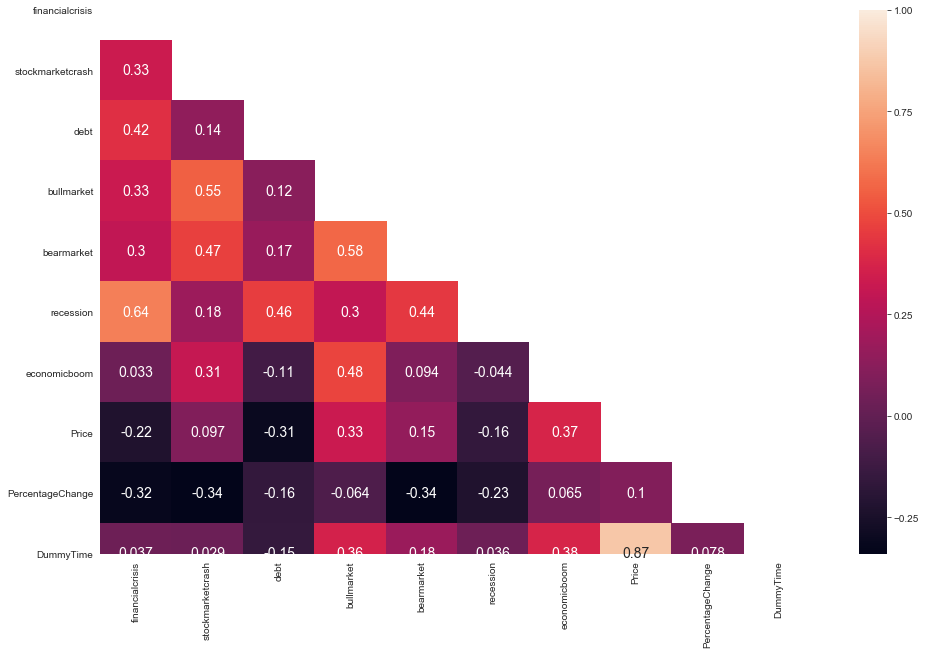

In [11]:
mask[triangle_indices] = True

plt.figure(figsize=(16,10))
sns.heatmap(data.corr(), mask=mask, annot=True, annot_kws={"size": 14})
sns.set_style('white')
plt.show()

# Making a linear regression model

In [12]:

price = np.log(data['Price'])
search_term = data.drop(['Price','Month'], axis=1)
X_train, X_test, y_train, y_test = train_test_split(search_term, price, test_size=0.3, random_state=43)


regr = LinearRegression(n_jobs=1)
regr.fit(X_train, y_train)



LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

# Get the p values and coefficient for each search term

In [13]:
X_incl_const = sm.add_constant(X_train)
model = sm.OLS(y_train, X_incl_const)
results = model.fit()

pd.DataFrame({'coef': results.params, 'p-values': round(results.pvalues, 3)})



/opt/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:2495: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


,coef,p-values
const,7.028361,0.000
financialcrisis,-0.017582,0.000
stockmarketcrash,0.002311,0.034
debt,-0.002224,0.054
bullmarket,0.000820,0.432
bearmarket,-0.000223,0.855
recession,-0.000396,0.580
economicboom,0.000760,0.163
PercentageChange,0.002296,0.405
DummyTime,0.005389,0.000


## Removing the search terms which have P values of < 0.05

In [14]:

price = np.log(data['Price'])
# Removing search terms that are not significant
search_term = data.drop(['Price','Month', 'recession', 'PercentageChange', 'economicboom', 'bullmarket', 'bearmarket'], axis=1)
X_train, X_test, y_train, y_test = train_test_split(search_term, price, test_size=0.3, random_state=43)


regr = LinearRegression(n_jobs=1)
regr.fit(X_train, y_train)

pd.DataFrame(data=regr.coef_, index=X_train.columns, columns=['COEF'])

pd.DataFrame(data=regr.coef_, index=X_train.columns, columns=['COEF'])
X_incl_const = sm.add_constant(X_train)
model = sm.OLS(y_train, X_incl_const)
results = model.fit()

revised_log_mse = results.mse_resid

pd.DataFrame({'coef': results.params, 'p-values': round(results.pvalues, 3)})

/opt/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:2495: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


,coef,p-values
const,7.079485,0.000
financialcrisis,-0.017727,0.000
stockmarketcrash,0.002960,0.001
debt,-0.002690,0.017
DummyTime,0.005539,0.000


# R Squared values for the above data and the test data

In [17]:
print('Training data R squared',regr.score(X_train, y_train))
print('Testing data R Squared', regr.score(X_test, y_test))


Training data R squared 0.9160273737027319
Testing data R Squared 0.5542774591822104
